In [86]:
import pandas as pd

blue_O1 = pd.read_csv("logs_blue/signal/O1.csv")
blue_O2 = pd.read_csv("logs_blue/signal/O2.csv")

red_O1 = pd.read_csv("logs_red/signal/O1.csv")
red_O2 = pd.read_csv("logs_red/signal/O2.csv")

green_O1 = pd.read_csv("logs_green/signal/O1.csv")
green_O2 = pd.read_csv("logs_green/signal/O2.csv")

gray_O1 = pd.read_csv("logs_gray/signal/O1.csv")
gray_O2 = pd.read_csv("logs_gray/signal/O2.csv")


blue_O1.drop(columns=["timestamp"], inplace=True)
blue_O2.drop(columns=["timestamp"], inplace=True)

red_O1.drop(columns=["timestamp"], inplace=True)
red_O2.drop(columns=["timestamp"], inplace=True)

gray_O1.drop(columns=["timestamp"], inplace=True)
gray_O2.drop(columns=["timestamp"], inplace=True)

green_O1.drop(columns=["timestamp"], inplace=True)
green_O2.drop(columns=["timestamp"], inplace=True)



In [87]:
# remove outliers using MAD (Median Absolute Deviation)
def remove_outliers_mad(df, threshold=3.5):
    median = df['value'].median()
    mad = (df['value'] - median).abs().median() * 1.4826
    modified_zscore = (df['value'] - median).abs() / mad
    return df[modified_zscore < threshold]

blue_O1 = remove_outliers_mad(blue_O1)
blue_O2 = remove_outliers_mad(blue_O2)

gray_O1 = remove_outliers_mad(gray_O1)
gray_O2 = remove_outliers_mad(gray_O2)

red_O1 = remove_outliers_mad(red_O1)
red_O2 = remove_outliers_mad(red_O2)

green_O1 = remove_outliers_mad(green_O1)
green_O2 = remove_outliers_mad(green_O2)



C:\Users\er321\AppData\Local\Temp\ipykernel_12104\1281430593.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Blue O1', 'Blue O2', 'Red O1', 'Red O2', 'Green O1', 'Green O2', 'Gray O1', 'Gray O2'])


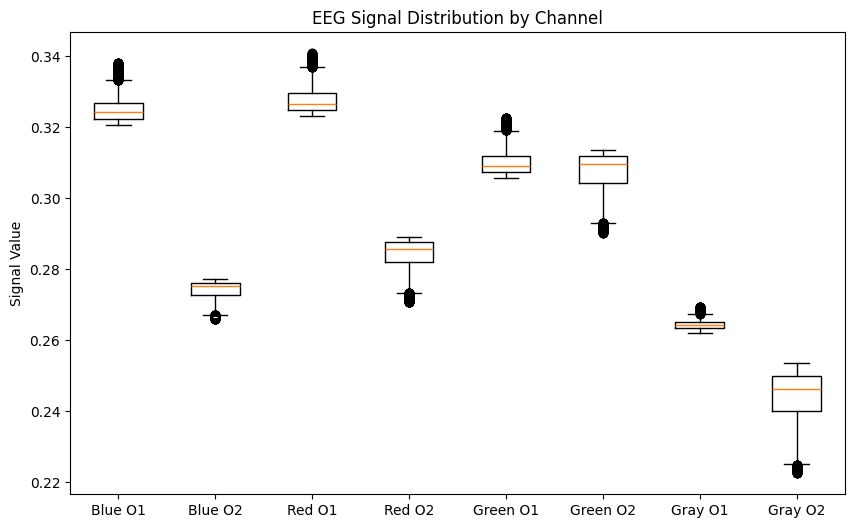

In [88]:
# display boxplots for all channels
import matplotlib.pyplot as plt
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create boxplots for all channels
data = [blue_O1['value'], blue_O2['value'], 
        red_O1['value'], red_O2['value'],
        green_O1['value'], green_O2['value'],
        gray_O1['value'], gray_O2['value']]
plt.boxplot(data, labels=['Blue O1', 'Blue O2', 'Red O1', 'Red O2', 'Green O1', 'Green O2', 'Gray O1', 'Gray O2'])

# Customize the plot
plt.title('EEG Signal Distribution by Channel')
plt.ylabel('Signal Value')

# Display the plot
plt.show()


In [89]:
# add labels
# Align the lengths of blue_O1 and blue_O2 and create a new DataFrame with columns "O1" and "O2"
min_len = min(len(blue_O1), len(blue_O2))
blue_df = pd.DataFrame({
    "O1": blue_O1["value"].iloc[:min_len].reset_index(drop=True),
    "O2": blue_O2["value"].iloc[:min_len].reset_index(drop=True)
})

min_len = min(len(blue_O1), len(blue_O2))
gray_df = pd.DataFrame({
    "O1": gray_O1["value"].iloc[:min_len].reset_index(drop=True),
    "O2": gray_O2["value"].iloc[:min_len].reset_index(drop=True)
})

min_len = min(len(red_O1), len(red_O2))
red_df = pd.DataFrame({
    "O1": red_O1["value"].iloc[:min_len].reset_index(drop=True),
    "O2": red_O2["value"].iloc[:min_len].reset_index(drop=True)
})

min_len = min(len(green_O1), len(green_O2))
green_df = pd.DataFrame({
    "O1": green_O1["value"].iloc[:min_len].reset_index(drop=True),
    "O2": green_O2["value"].iloc[:min_len].reset_index(drop=True)
})

blue_df['label'] = 'blue'
gray_df['label'] = 'gray'
red_df['label'] = 'red'
green_df['label'] = 'green'

df = pd.concat([blue_df, gray_df, red_df, green_df])

print(df.head())


         O1        O2 label
0  0.337937  0.270705  blue
1  0.337700  0.265922  blue
2  0.337562  0.266012  blue
3  0.337483  0.266068  blue
4  0.337992  0.266135  blue


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [91]:
x = df[["O1", "O2"]]
y = df["label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LogisticRegression(class_weight="balanced")
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [95]:
print(x_test.head())

            O1        O2
3686  0.307423  0.312241
2770  0.264501  0.246775
3420  0.263964  0.247952
288   0.332252  0.268352
629   0.328328  0.270255


In [92]:
predictions = model.predict(x_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        blue       0.83      1.00      0.91       871
        gray       1.00      1.00      1.00       883
       green       1.00      0.98      0.99       994
         red       0.97      0.81      0.88       920

    accuracy                           0.95      3668
   macro avg       0.95      0.95      0.95      3668
weighted avg       0.95      0.95      0.95      3668



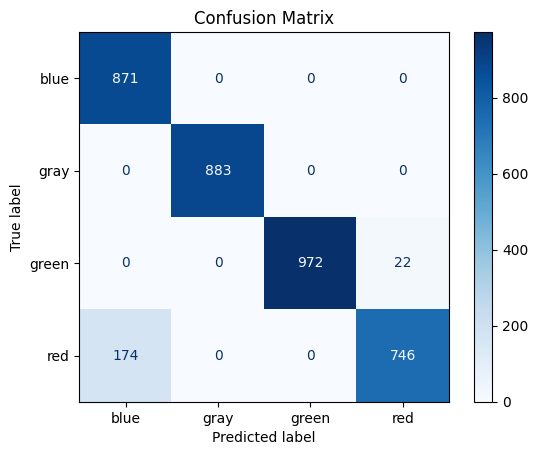

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix using the true labels and predictions
cm = confusion_matrix(y_test, predictions, labels=model.classes_)

# Create a confusion matrix display and plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [94]:
# import joblib

# # Save the trained model to a file
# joblib.dump(model, 'eeg_color_classifier.joblib')


['eeg_color_classifier.joblib']